In [2]:
import mxnet as mx
import numpy as np

In [3]:
train_data = np.random.uniform(0,1,[100,2])

In [6]:
train_label = np.array([train_data[i][0] *2 + train_data[i][1] for i in range(0,train_data.shape[0])])

In [10]:
batch_size=1
eval_data=np.array([[1,2],[3,4],[5,8]])
eval_label=np.array([4,12,20])

In [11]:
train_iter = mx.io.NDArrayIter(train_data,train_label, batch_size,shuffle=True,label_name='linear_reg_label')
eval_iter = mx.io.NDArrayIter(eval_data,eval_label,batch_size,shuffle=False)

In [12]:
X = mx.sym.Variable('data')
y = mx.sym.Variable('linear_reg_label')
fc1 = mx.sym.FullyConnected(data=X,name='fc1',num_hidden=1)
lr = mx.sym.LinearRegressionOutput(data=fc1,label=y,name='lr')

In [17]:
model = mx.mod.Module(symbol=lr,data_names=['data'], label_names=['linear_reg_label'])

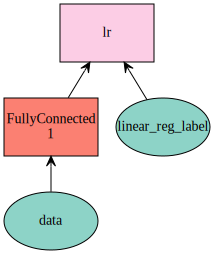

In [18]:
mx.viz.plot_network(symbol=lr)

In [22]:
model.fit(train_iter, eval_iter,optimizer_params={'learning_rate':0.001,'momentum':0.9}, 
                                                  num_epoch=50,
                                                  eval_metric='mse',
                                                  batch_end_callback=mx.callback.Speedometer(batch_size,2))

/opt/anaconda2/lib/python2.7/site-packages/mxnet/module/base_module.py:464: UserWarning: Parameters already initialized and force_init=False. init_params call ignored.
  allow_missing=allow_missing, force_init=force_init)


In [21]:
model.predict(eval_iter).asnumpy()

array([[  3.2740047 ],
       [  7.13523245],
       [ 12.48402596]], dtype=float32)